In [63]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn


In [64]:
%matplotlib inline

In [65]:
import urllib.request as ur
file_store=ur.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')



In [66]:
station_file=open('stations.txt','r').readlines()
#open('stations.txt','r').readlines()[:10]

In [67]:
stations={}

for line in station_file:
    if 'GSN' in line:
        fields=line.split()
        stations[fields[0]]=' '.join(fields[4:])
        
        
        

In [68]:
len(stations)

994

In [69]:
def findstations(s):
    found= {code:name for code,name in stations.items() if s in name}
    print(found)

In [70]:
#findstations('LIHUE')

In [71]:
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

In [72]:
DLY_FILE=open('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00022536.dly','r')
open('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00022536.dly','r').readlines()

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [73]:
#open('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/readme.txt','r').readlines()[98:121]


In [74]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter=dly_delimiter,
                         dtype=dly_dtype,
                         usecols=dly_usecols,
                         names=dly_names)

# delimiter puts a delimiter after 11 characters, then 4 , then 2 , then 4 and so on in respect to [11,4,2,4]
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
# usecols starts from 1 therefore 0 is eliminated and so are 5,6,7 because they are not multiples of 4
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [75]:

lihue=parsefile(DLY_FILE)



In [76]:
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9,

In [77]:
def unroll(record):
    # {}-{:02} This is pyformat. The string will be formatted according to the given specification.
    # for more documentation see "https://pyformat.info/" 
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    # to understand the code better it is easier if one put's breakpoint 
    #breakpoint()
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    # M8[D] , type of date format [D] or [M] or [Y] for day, month or year 
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [78]:
#unroll(lihue[0])


In [79]:
#def getobs(filename,obs):
#    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [80]:
#[(row[2]) for row in lihue if row[2] == 'TMIN']
# run this to see what this code does 

In [81]:
#getobs('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00022536.dly','TMIN')

In [82]:
#lihue_tmax=getobs('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00022536.dly','TMAX')
#lihue_tmin=getobs('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00022536.dly','TMIN')

In [83]:
#pp.plot(lihue_tmax['date'],lihue_tmax['value'])

In [84]:
def getobs(filename,obs):
    data=np.concatenate([unroll(row) for row in parsefile(filename) if row[2]==obs])
    # replace the unusual high negative value 
    data['value'][data['value']==-999.9]=np.nan
    return data

In [85]:
lihue_tmax=getobs('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00022536.dly','TMAX')
lihue_tmin=getobs('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00022536.dly','TMIN')

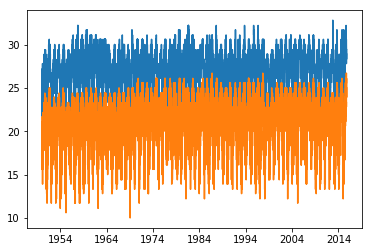

In [86]:
# to get the max value and date
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
# to get the min value and date
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

In [87]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(nan, nan)

[0, 8, 0, 12]

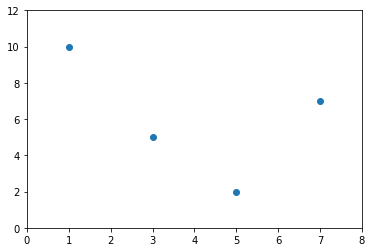

In [88]:
# creating an array of decimal data type 
x = np.array([1,3,5,7],'d')
y = np.array([10,5,2,7],'d')

pp.plot(x,y,'o')

pp.axis([0,8,0,12])

In [89]:
# linspace- generates number from start=1 to stop=1 with default 50 obs
xs = np.linspace(1,7)
# interpolates - used to get denser points x= [1,3,5,7] y=[10,5,2,7]
# xs- telling the function how many numbers with what spatial density
#x- telling the function that range of x is 1-3
#y- telling the function that range of y is 10-5
# overall it is saying between the ranges given by coordinates/ boundaries; produce numbers with this density. Learn by changing
# the linspace from (1,5) or (2,6)
ys = np.interp(xs,x,y)




In [90]:
# observe that in the 5 columns here values are increasing from 1 to 7 with each column starting and stopping values from ~1 to ~7 but we can still see some pattern
xs

array([1.        , 1.12244898, 1.24489796, 1.36734694, 1.48979592,
       1.6122449 , 1.73469388, 1.85714286, 1.97959184, 2.10204082,
       2.2244898 , 2.34693878, 2.46938776, 2.59183673, 2.71428571,
       2.83673469, 2.95918367, 3.08163265, 3.20408163, 3.32653061,
       3.44897959, 3.57142857, 3.69387755, 3.81632653, 3.93877551,
       4.06122449, 4.18367347, 4.30612245, 4.42857143, 4.55102041,
       4.67346939, 4.79591837, 4.91836735, 5.04081633, 5.16326531,
       5.28571429, 5.40816327, 5.53061224, 5.65306122, 5.7755102 ,
       5.89795918, 6.02040816, 6.14285714, 6.26530612, 6.3877551 ,
       6.51020408, 6.63265306, 6.75510204, 6.87755102, 7.        ])

In [91]:
# it is observed that numbers have a trend opposite to xs 
# another trend which is observed is numbers in a column are similar to ~10,~5,~2,~7
ys

array([10.        ,  9.69387755,  9.3877551 ,  9.08163265,  8.7755102 ,
        8.46938776,  8.16326531,  7.85714286,  7.55102041,  7.24489796,
        6.93877551,  6.63265306,  6.32653061,  6.02040816,  5.71428571,
        5.40816327,  5.10204082,  4.87755102,  4.69387755,  4.51020408,
        4.32653061,  4.14285714,  3.95918367,  3.7755102 ,  3.59183673,
        3.40816327,  3.2244898 ,  3.04081633,  2.85714286,  2.67346939,
        2.48979592,  2.30612245,  2.12244898,  2.10204082,  2.40816327,
        2.71428571,  3.02040816,  3.32653061,  3.63265306,  3.93877551,
        4.24489796,  4.55102041,  4.85714286,  5.16326531,  5.46938776,
        5.7755102 ,  6.08163265,  6.3877551 ,  6.69387755,  7.        ])

[0, 8, 0, 12]

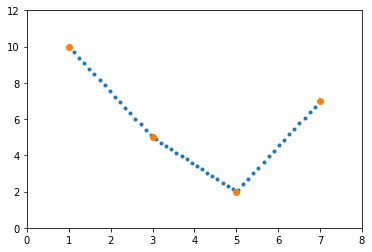

In [92]:
pp.plot(xs,ys,'.')
pp.plot(x,y,'o')

pp.axis([0,8,0,12])

In [93]:
#def fillnans(data):
    
    # nan stores all the nan values
    #It will be a boolean vector like True,True, False, True, False
 #   nan = np.isnan(data['value'])
    
    # Left side is evaluated separately and so is right side and then assigned
    
    
  #  data['value'][nan] = np.interp(data['date'][nan],data['date'][~nan],data['value'][~nan])
    

In [94]:
#fillnans(lihue_tmax)

In [95]:


# above doesn't work because the function np.interp is not able to float arguments

#so we need to manually change the dates range to floating point

def fillnans(data):
    
    # note that in python in the right side of the assignment operator 
    # 1) data['date'] loads date such as 1/1/2018,1/2/2018 etc. 
    # 2) function is called on the entire data set, and then np.float64 is passed to the called function       

       dates_float = data['date'].astype(np.float64)
    
       nan = np.isnan(data['value'])
    
       data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])
    
fillnans(lihue_tmax)
fillnans(lihue_tmin)

np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(21.051530250594173, 27.300908977192176)

In [96]:
lihue_tmax['date'].astype(np.float64)[0]

-7274.0

In [97]:
def plot_smoothed(t,win=10):
    
    
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    # explanation 
    #np.ones(win)- length of the series to correlate to 
    #'same' produces the length of the series equivalent to the max length of the inputs.
    pp.plot(t['date'],smoothed)

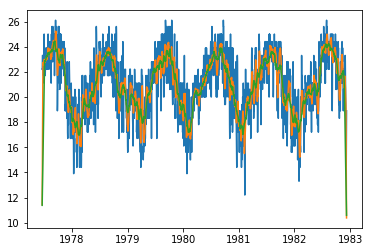

In [98]:
pp.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'])

plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],30)

#plot_smoothed(lihue_tmin[10000:12000],30)

# uncomment and see the plot, makes it much easier to understand 

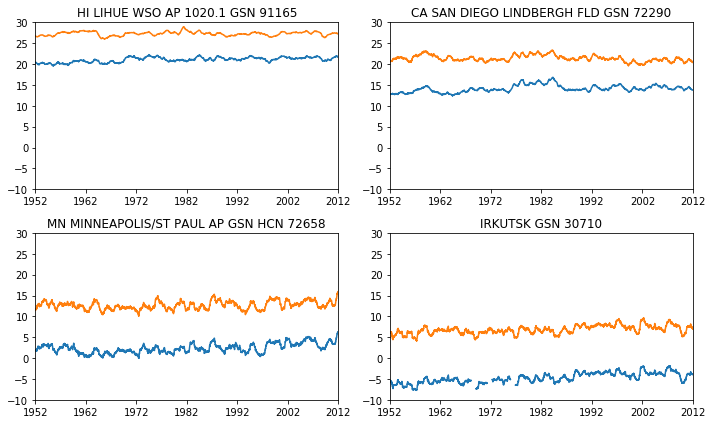

In [99]:
pp.figure(figsize=(10,6))

for i,code in enumerate(datastations):
    pp.subplot(2,2,i+1)
    
    plot_smoothed(getobs('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/{}.dly'.format(code),'TMAX'),365)
    
    pp.title(stations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

pp.tight_layout()

In [100]:
def selectyear(data,year):
    
    start = np.datetime64('{}'.format(year))
    # it is just a way to make sure that the arguments which are passed are considered as a string 
    #can also be written as
    #start = np.datetime64(year)
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [101]:
#selectyear(lihue_tmin,'1951')
selectyear(lihue_tmin,1951)

array([17.8, 17.8, 17.2, 18.3, 20. , 21.7, 22.2, 21.7, 22.2, 22.2, 21.7,
       21.7, 19.4, 18.9, 18.3, 18.3, 19.4, 20.6, 16.7, 14.4, 14.4, 17.2,
       15. , 12.8, 14.4, 13.3, 15. , 14.4, 17.8, 18.3, 16.7, 16.7, 17.2,
       16.7, 17.8, 14.4, 12.2, 13.3, 13.9, 12.8, 14.4, 14.4, 18.9, 19.4,
       20. , 18.3, 18.3, 18.9, 20. , 18.3, 19.4, 13.3, 11.7, 17.8, 17.2,
       17.8, 21.1, 22.2, 20.6, 22.2, 19.4, 20. , 18.3, 17.8, 17.8, 17.2,
       16.1, 18.9, 18.9, 18.9, 17.8, 16.7, 15.6, 13.3, 13.9, 15.6, 15.6,
       21.7, 20.6, 18.3, 15.6, 14.4, 17.2, 17.8, 18.9, 20. , 18.9, 18.3,
       18.3, 20.6, 20. , 18.9, 18.3, 21.1, 16.7, 21.7, 21.1, 21.7, 17.2,
       16.7, 17.8, 18.3, 16.1, 19.4, 20.6, 18.3, 18.3, 17.2, 18.9, 21.7,
       21.7, 21.7, 21.1, 20.6, 20.6, 20. , 21.7, 20. , 20. , 19.4, 18.3,
       21.7, 22.2, 22.8, 20. , 19.4, 17.2, 22.2, 22.8, 22.8, 22.8, 18.9,
       17.8, 18.3, 19.4, 22.8, 22.2, 22.2, 20.6, 21.1, 21.1, 22.8, 19.4,
       19.4, 20.6, 21.7, 23.3, 23.3, 22.2, 22.2, 23

In [102]:

lihue_tmin_all = np.vstack([selectyear(lihue_tmin,year)[:365] for year in range(1951,2014+1)])
# equivalent to dim or str of R
lihue_tmin_all.shape

#64*365; 64= no of years ; 365= no of days 


(64, 365)

In [103]:
# by setting axis=0 we are saying that we want minimum of the entire row or in layman terms it means that minimum and maximum
#temperature of the year
lihue_tmin_recordmin = np.min(lihue_tmin_all,axis=0)
lihue_tmin_recordmax = np.max(lihue_tmin_all,axis=0)

In [104]:
len(lihue_tmin_recordmax)

365

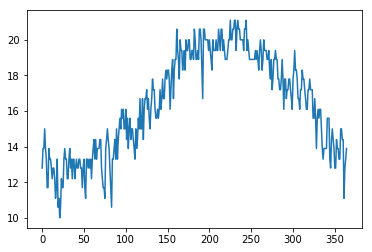

In [105]:
#show me the minimum temperature of 365 days across the range of 64 years
pp.plot(lihue_tmin_recordmin)





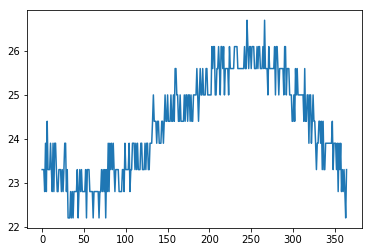

In [106]:
pp.plot(lihue_tmin_recordmax)

In [107]:
lihue_tmax_all = np.vstack([selectyear(lihue_tmax,year)[:365] for year in range(1951,2014+1)])

(-18.25, 383.25, 8.86, 33.94)

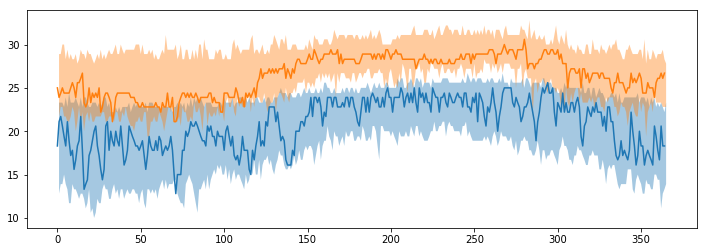

In [108]:
pp.figure(figsize=(12,4))

days = np.arange(1,365+1)

pp.fill_between(days,np.min(lihue_tmin_all,axis=0),np.max(lihue_tmin_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmin,2009))

pp.fill_between(days,np.min(lihue_tmax_all,axis=0),np.max(lihue_tmax_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmax,2009))

# doesn't make any difference even if you leave it empty 
pp.axis()
#or
#pp.axis(xmax=365)

In [109]:
# this is a sequence generator
#np.arange(1,365+1)

In [110]:
# Challenge question 

#Find the year with the highest mean TMAX for Minneapolis
#Find the year with the highest mean TMIN for San diego

#1 ) Step 1: Finding the records for Minneapolis

findstations('MINNEAPOLIS')


{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [111]:
# We found out that data for Minneapolis resides in USW00014922.dly file 

DLY_CHAL_FILE='C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00014922.dly'
MPOLIS=parsefile(DLY_CHAL_FILE)

# converted the data to a readable format. Unusually large value have been converted into nan
MPOLIS=getobs(DLY_CHAL_FILE,'TMAX')

# converting those nan values by using interp function. Note that interp function would work only when the data limits are
# given. If those nan values are unsually high values then by no means we can identify what their value would be 


In [112]:
fillnans(MPOLIS)



In [113]:
# this is the overall tmax(max temperature of the day) mean ( taken over 365 days for many years) for minneapolis 
np.mean(MPOLIS['value'])

12.74308121666019

In [114]:
# stacking all year data on top of each other 
min(MPOLIS['date'])
max(MPOLIS['date'])

#years should be used because then we will be using it to find the year with the highest mean
years=np.arange(1940,2014+1)

# we find that the data has 1938 as the lowest year
MPOLIS_tmax_all = np.vstack([selectyear(MPOLIS,year)[:365] for year in range(1940,2014+1)])

In [115]:
# if I enter min date as the year , it goes to an error state because all the values are not available for years before 1951

In [116]:
MPOLIS_tmax_all

array([[-13.9, -12.8, -12.2, ...,   1.1,   1.7,   1.1],
       [  1.7,   0.6,  -8.3, ...,  -5.6,  -2.2,  -8.9],
       [ -8.9, -14.4, -15. , ...,  -6.1,  -6.7,  -2.2],
       ...,
       [  1.1,  -6.7,  -1.7, ...,  -3.3,  -7.2,  -3.9],
       [ -6.7,  -6.1,  -5.6, ...,  -6.6, -16.6, -18.2],
       [-17.1, -15.5,  -1.6, ..., -12.1, -15.5, -10.5]])

In [117]:


# converting MPOLIS to an array 

a=np.array(MPOLIS_tmax_all)

# now we need to take the mean row wise 
a_max=(a.mean(axis=1))

# for which year 
idx = np.argmax(a_max)

#what is the maximum value
years[idx] 


# the year should be 1999    

2012

In [ ]:
# 2nd part of the challenge question

In [121]:
findstations("SAN DIEGO")
DLY_CHAL_FILE='C:/Users/chopr/Dropbox/Python/ExerciseFiles/Ch5/05_03/USW00023188.dly'
SANDIEGO=getobs(DLY_CHAL_FILE,'TMIN')
fillnans(SANDIEGO)
np.mean(SANDIEGO['value'])

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


13.958362356827402

In [125]:
years=np.arange(1940,2014+1)

# we find that the data has 1938 as the lowest year
SANDIEGO_tmin_all = np.vstack([selectyear(SANDIEGO,year)[:365] for year in years])
a=np.array(SANDIEGO_tmin_all)

# now we need to take the mean row wise 
a_max=(a.mean(axis=1))

# for which year 
idx = np.argmin(a_max)

#what is the maximum value
years[idx] 


1948